In [324]:
import torch
import torch.nn.functional as F

Question 1: train a trigram language model, i.e. take two characters as an input to predict the 3rd one. Feel free to use either counting or a neural net. Evaluate the loss; Did it improve over a bigram model?

In [325]:
names = open("video_2_dependencies/names.txt").read().splitlines()

In [326]:
names[:10]

['emma',
 'olivia',
 'ava',
 'isabella',
 'sophia',
 'charlotte',
 'mia',
 'amelia',
 'harper',
 'evelyn']

In [327]:
alphabet = sorted(["."] + list(set("".join(names))))

In [328]:
alphabet

['.',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z']

In [329]:
single_stoi = {unigram: idx for idx, unigram in enumerate(alphabet)}
single_itos = {idx: s for s, idx in single_stoi.items()}

In [330]:
single_stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26}

In [331]:
single_itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [332]:
bigrams = []
for i in alphabet:
    for j in alphabet:
        bigrams.append((i + j))

In [333]:
bigrams

['..',
 '.a',
 '.b',
 '.c',
 '.d',
 '.e',
 '.f',
 '.g',
 '.h',
 '.i',
 '.j',
 '.k',
 '.l',
 '.m',
 '.n',
 '.o',
 '.p',
 '.q',
 '.r',
 '.s',
 '.t',
 '.u',
 '.v',
 '.w',
 '.x',
 '.y',
 '.z',
 'a.',
 'aa',
 'ab',
 'ac',
 'ad',
 'ae',
 'af',
 'ag',
 'ah',
 'ai',
 'aj',
 'ak',
 'al',
 'am',
 'an',
 'ao',
 'ap',
 'aq',
 'ar',
 'as',
 'at',
 'au',
 'av',
 'aw',
 'ax',
 'ay',
 'az',
 'b.',
 'ba',
 'bb',
 'bc',
 'bd',
 'be',
 'bf',
 'bg',
 'bh',
 'bi',
 'bj',
 'bk',
 'bl',
 'bm',
 'bn',
 'bo',
 'bp',
 'bq',
 'br',
 'bs',
 'bt',
 'bu',
 'bv',
 'bw',
 'bx',
 'by',
 'bz',
 'c.',
 'ca',
 'cb',
 'cc',
 'cd',
 'ce',
 'cf',
 'cg',
 'ch',
 'ci',
 'cj',
 'ck',
 'cl',
 'cm',
 'cn',
 'co',
 'cp',
 'cq',
 'cr',
 'cs',
 'ct',
 'cu',
 'cv',
 'cw',
 'cx',
 'cy',
 'cz',
 'd.',
 'da',
 'db',
 'dc',
 'dd',
 'de',
 'df',
 'dg',
 'dh',
 'di',
 'dj',
 'dk',
 'dl',
 'dm',
 'dn',
 'do',
 'dp',
 'dq',
 'dr',
 'ds',
 'dt',
 'du',
 'dv',
 'dw',
 'dx',
 'dy',
 'dz',
 'e.',
 'ea',
 'eb',
 'ec',
 'ed',
 'ee',
 'ef',
 'eg',

In [334]:
bi_stoi = {bigram: idx for idx, bigram in enumerate(bigrams)}
bi_itos = {idx: s for s, idx in bi_stoi.items()}

In [335]:
bi_stoi

{'..': 0,
 '.a': 1,
 '.b': 2,
 '.c': 3,
 '.d': 4,
 '.e': 5,
 '.f': 6,
 '.g': 7,
 '.h': 8,
 '.i': 9,
 '.j': 10,
 '.k': 11,
 '.l': 12,
 '.m': 13,
 '.n': 14,
 '.o': 15,
 '.p': 16,
 '.q': 17,
 '.r': 18,
 '.s': 19,
 '.t': 20,
 '.u': 21,
 '.v': 22,
 '.w': 23,
 '.x': 24,
 '.y': 25,
 '.z': 26,
 'a.': 27,
 'aa': 28,
 'ab': 29,
 'ac': 30,
 'ad': 31,
 'ae': 32,
 'af': 33,
 'ag': 34,
 'ah': 35,
 'ai': 36,
 'aj': 37,
 'ak': 38,
 'al': 39,
 'am': 40,
 'an': 41,
 'ao': 42,
 'ap': 43,
 'aq': 44,
 'ar': 45,
 'as': 46,
 'at': 47,
 'au': 48,
 'av': 49,
 'aw': 50,
 'ax': 51,
 'ay': 52,
 'az': 53,
 'b.': 54,
 'ba': 55,
 'bb': 56,
 'bc': 57,
 'bd': 58,
 'be': 59,
 'bf': 60,
 'bg': 61,
 'bh': 62,
 'bi': 63,
 'bj': 64,
 'bk': 65,
 'bl': 66,
 'bm': 67,
 'bn': 68,
 'bo': 69,
 'bp': 70,
 'bq': 71,
 'br': 72,
 'bs': 73,
 'bt': 74,
 'bu': 75,
 'bv': 76,
 'bw': 77,
 'bx': 78,
 'by': 79,
 'bz': 80,
 'c.': 81,
 'ca': 82,
 'cb': 83,
 'cc': 84,
 'cd': 85,
 'ce': 86,
 'cf': 87,
 'cg': 88,
 'ch': 89,
 'ci': 90,
 'cj': 91

In [336]:
bi_itos

{0: '..',
 1: '.a',
 2: '.b',
 3: '.c',
 4: '.d',
 5: '.e',
 6: '.f',
 7: '.g',
 8: '.h',
 9: '.i',
 10: '.j',
 11: '.k',
 12: '.l',
 13: '.m',
 14: '.n',
 15: '.o',
 16: '.p',
 17: '.q',
 18: '.r',
 19: '.s',
 20: '.t',
 21: '.u',
 22: '.v',
 23: '.w',
 24: '.x',
 25: '.y',
 26: '.z',
 27: 'a.',
 28: 'aa',
 29: 'ab',
 30: 'ac',
 31: 'ad',
 32: 'ae',
 33: 'af',
 34: 'ag',
 35: 'ah',
 36: 'ai',
 37: 'aj',
 38: 'ak',
 39: 'al',
 40: 'am',
 41: 'an',
 42: 'ao',
 43: 'ap',
 44: 'aq',
 45: 'ar',
 46: 'as',
 47: 'at',
 48: 'au',
 49: 'av',
 50: 'aw',
 51: 'ax',
 52: 'ay',
 53: 'az',
 54: 'b.',
 55: 'ba',
 56: 'bb',
 57: 'bc',
 58: 'bd',
 59: 'be',
 60: 'bf',
 61: 'bg',
 62: 'bh',
 63: 'bi',
 64: 'bj',
 65: 'bk',
 66: 'bl',
 67: 'bm',
 68: 'bn',
 69: 'bo',
 70: 'bp',
 71: 'bq',
 72: 'br',
 73: 'bs',
 74: 'bt',
 75: 'bu',
 76: 'bv',
 77: 'bw',
 78: 'bx',
 79: 'by',
 80: 'bz',
 81: 'c.',
 82: 'ca',
 83: 'cb',
 84: 'cc',
 85: 'cd',
 86: 'ce',
 87: 'cf',
 88: 'cg',
 89: 'ch',
 90: 'ci',
 91: 'cj'

In [337]:
""" Creating Dataset """
input = []
labels = []
for name in names:
    name = ".." + name + "."
    for x_1, x_2, y in list(zip(name, name[1:], name[2:])):
        input.append(bi_stoi[x_1 + x_2])
        labels.append(single_stoi[y])

In [338]:
input = torch.tensor(input)

In [339]:
generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(input, 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True

for _ in range(500):
    logits = one_hot_input @ W
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(labels)), labels]))
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad

tensor(3.7623, grad_fn=<MeanBackward0>)
tensor(3.6609, grad_fn=<MeanBackward0>)
tensor(3.5881, grad_fn=<MeanBackward0>)
tensor(3.5272, grad_fn=<MeanBackward0>)
tensor(3.4734, grad_fn=<MeanBackward0>)
tensor(3.4246, grad_fn=<MeanBackward0>)
tensor(3.3797, grad_fn=<MeanBackward0>)
tensor(3.3381, grad_fn=<MeanBackward0>)
tensor(3.2993, grad_fn=<MeanBackward0>)
tensor(3.2632, grad_fn=<MeanBackward0>)
tensor(3.2294, grad_fn=<MeanBackward0>)
tensor(3.1978, grad_fn=<MeanBackward0>)
tensor(3.1682, grad_fn=<MeanBackward0>)
tensor(3.1405, grad_fn=<MeanBackward0>)
tensor(3.1144, grad_fn=<MeanBackward0>)
tensor(3.0899, grad_fn=<MeanBackward0>)
tensor(3.0667, grad_fn=<MeanBackward0>)
tensor(3.0448, grad_fn=<MeanBackward0>)
tensor(3.0241, grad_fn=<MeanBackward0>)
tensor(3.0044, grad_fn=<MeanBackward0>)
tensor(2.9858, grad_fn=<MeanBackward0>)
tensor(2.9682, grad_fn=<MeanBackward0>)
tensor(2.9514, grad_fn=<MeanBackward0>)
tensor(2.9355, grad_fn=<MeanBackward0>)
tensor(2.9203, grad_fn=<MeanBackward0>)


It provided a substantial improvement over the bigram model, w.r.t to having a lower loss, as intuitively, there is more context available for next token prediction

Question 2: Split up the dataset randomly into 80% train set, 10% dev set, 10% test set. Train the bigram and trigram models only on the training set. Evaluate them on dev and test splits. What can you see?

In [341]:
""" Creating Bigram Train Splits """

bi_inputs = []
bi_labels = []
for name in names:
    name = "." + name + "."
    for x, y in list(zip(name, name[1:])):
        bi_inputs.append(single_stoi[x])
        bi_labels.append(single_stoi[y])

bi_inputs = torch.tensor(bi_inputs)
bi_labels = torch.tensor(bi_labels)

idxs = torch.arange(len(bi_labels))
random_idxs = idxs[torch.randperm(len(idxs))]

bi_train_inputs = bi_inputs[random_idxs[: int(len(random_idxs)*0.8)]]
bi_train_labels = bi_labels[random_idxs[: int(len(random_idxs)*0.8)]]

bi_val_inputs = bi_inputs[random_idxs[int(len(random_idxs)*0.8):int(len(random_idxs)*0.9)]]
bi_val_labels = bi_labels[random_idxs[int(len(random_idxs)*0.8):int(len(random_idxs)*0.9)]]

bi_test_inputs = bi_inputs[random_idxs[int(len(random_idxs)*0.9):]]
bi_test_labels = bi_labels[random_idxs[int(len(random_idxs)*0.9):]]

print(len(bi_labels), len(bi_train_labels), len(bi_val_labels), len(bi_test_labels))


228146 182516 22815 22815


In [342]:
""" Creating Trigram Train Splits """

tri_inputs = []
tri_labels = []
for name in names:
    name = ".." + name + "."
    for x_1, x_2, y in list(zip(name, name[1:], name[2:])):
        tri_inputs.append(bi_stoi[x_1 + x_2])
        tri_labels.append(single_stoi[y])

tri_inputs = torch.tensor(tri_inputs)
tri_labels = torch.tensor(tri_labels)

idxs = torch.arange(len(tri_labels))
random_idxs = idxs[torch.randperm(len(idxs))]

tri_train_inputs = tri_inputs[random_idxs[: int(len(random_idxs)*0.8)]]
tri_train_labels = tri_labels[random_idxs[: int(len(random_idxs)*0.8)]]

tri_val_inputs = tri_inputs[random_idxs[int(len(random_idxs)*0.8):int(len(random_idxs)*0.9)]]
tri_val_labels = tri_labels[random_idxs[int(len(random_idxs)*0.8):int(len(random_idxs)*0.9)]]

tri_test_inputs = tri_inputs[random_idxs[int(len(random_idxs)*0.9):]]
tri_test_labels = tri_labels[random_idxs[int(len(random_idxs)*0.9):]]

print(len(tri_labels), len(tri_train_labels), len(tri_val_labels), len(tri_test_labels))


228146 182516 22815 22815


In [343]:
""" BiGram Model Train and eval performance"""
generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(bi_train_inputs, 27).float()
W = torch.randn(size = (27, 27), generator = generator); W.requires_grad = True

for _ in range(500):
    logits = one_hot_input @ W
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(bi_train_labels)), bi_train_labels]))
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad


for eval_name, eval_data in {"val":(bi_val_inputs, bi_val_labels), "test":(bi_test_inputs, bi_test_labels)}.items():
    eval_dataset, eval_labels = eval_data
    eval_logits = F.one_hot(eval_dataset, 27).float() @ W
    eval_counts = eval_logits.exp()
    eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
    eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
    print(f"Performance on {eval_name}: {eval_loss})")

tensor(3.7855, grad_fn=<MeanBackward0>)
tensor(3.3922, grad_fn=<MeanBackward0>)
tensor(3.1671, grad_fn=<MeanBackward0>)
tensor(3.0250, grad_fn=<MeanBackward0>)
tensor(2.9242, grad_fn=<MeanBackward0>)
tensor(2.8504, grad_fn=<MeanBackward0>)
tensor(2.7953, grad_fn=<MeanBackward0>)
tensor(2.7531, grad_fn=<MeanBackward0>)
tensor(2.7201, grad_fn=<MeanBackward0>)
tensor(2.6937, grad_fn=<MeanBackward0>)
tensor(2.6722, grad_fn=<MeanBackward0>)
tensor(2.6544, grad_fn=<MeanBackward0>)
tensor(2.6394, grad_fn=<MeanBackward0>)
tensor(2.6265, grad_fn=<MeanBackward0>)
tensor(2.6152, grad_fn=<MeanBackward0>)
tensor(2.6052, grad_fn=<MeanBackward0>)
tensor(2.5963, grad_fn=<MeanBackward0>)
tensor(2.5883, grad_fn=<MeanBackward0>)
tensor(2.5810, grad_fn=<MeanBackward0>)
tensor(2.5744, grad_fn=<MeanBackward0>)
tensor(2.5684, grad_fn=<MeanBackward0>)
tensor(2.5629, grad_fn=<MeanBackward0>)
tensor(2.5578, grad_fn=<MeanBackward0>)
tensor(2.5531, grad_fn=<MeanBackward0>)
tensor(2.5488, grad_fn=<MeanBackward0>)


In [344]:
""" TriGram Model Train and eval performance"""
generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(tri_train_inputs, 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True

for _ in range(500):
    logits = one_hot_input @ W
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(tri_train_labels)), tri_train_labels]))
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad


for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels), "test":(tri_test_inputs, tri_test_labels)}.items():
    eval_dataset, eval_labels = eval_data
    eval_logits = F.one_hot(eval_dataset, 729).float() @ W
    eval_counts = eval_logits.exp()
    eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
    eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
    print(f"Performance on {eval_name}: {eval_loss})")

tensor(3.7631, grad_fn=<MeanBackward0>)
tensor(3.6616, grad_fn=<MeanBackward0>)
tensor(3.5888, grad_fn=<MeanBackward0>)
tensor(3.5279, grad_fn=<MeanBackward0>)
tensor(3.4741, grad_fn=<MeanBackward0>)
tensor(3.4253, grad_fn=<MeanBackward0>)
tensor(3.3804, grad_fn=<MeanBackward0>)
tensor(3.3387, grad_fn=<MeanBackward0>)
tensor(3.2999, grad_fn=<MeanBackward0>)
tensor(3.2637, grad_fn=<MeanBackward0>)
tensor(3.2298, grad_fn=<MeanBackward0>)
tensor(3.1981, grad_fn=<MeanBackward0>)
tensor(3.1684, grad_fn=<MeanBackward0>)
tensor(3.1405, grad_fn=<MeanBackward0>)
tensor(3.1143, grad_fn=<MeanBackward0>)
tensor(3.0896, grad_fn=<MeanBackward0>)
tensor(3.0664, grad_fn=<MeanBackward0>)
tensor(3.0444, grad_fn=<MeanBackward0>)
tensor(3.0235, grad_fn=<MeanBackward0>)
tensor(3.0038, grad_fn=<MeanBackward0>)
tensor(2.9852, grad_fn=<MeanBackward0>)
tensor(2.9674, grad_fn=<MeanBackward0>)
tensor(2.9506, grad_fn=<MeanBackward0>)
tensor(2.9346, grad_fn=<MeanBackward0>)
tensor(2.9194, grad_fn=<MeanBackward0>)


Both Models performed slightly worse on the external datasets

Q: use the dev set to tune the strength of smoothing (or regularization) for the trigram model - i.e. try many possibilities and see which one works best based on the dev set loss. What patterns can you see in the train and dev set loss as you tune this strength? Take the best setting of the smoothing and evaluate on the test set once and at the end. How good of a loss do you achieve?


In [352]:
""" TriGram Model HP Tuning"""
strength_ranges = [float(10)**pow for pow in torch.arange(-4, 2, 0.5)]
train_performances = []
val_performances = []
epochs = 500

for strength in strength_ranges:
    generator = torch.Generator().manual_seed(7)
    one_hot_input = F.one_hot(tri_train_inputs, 729).float()
    W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True
    print(f"Using Reg Strength of {strength}")
    for epoch in range(epochs):
        logits = one_hot_input @ W
        counts = logits.exp()
        probs = counts/torch.sum(counts, dim = 1, keepdim = True)
        loss = torch.mean(-torch.log(probs[torch.arange(len(tri_train_labels)), tri_train_labels]))
        regularizer = torch.mean(W**2) * strength
        loss += regularizer
        print(loss)

        W.grad = None

        loss.backward()

        W.data -= 50*W.grad

        if epoch == (epochs - 1):
            train_performances.append(loss.item())
            for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels)}.items():
                eval_dataset, eval_labels = eval_data
                eval_logits = F.one_hot(eval_dataset, 729).float() @ W
                eval_counts = eval_logits.exp()
                eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
                eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
                # eval_regularizer = torch.mean(W**2) * strength
                # eval_loss += eval_regularizer
                print(f"Performance on {eval_name}: {eval_loss})")
                val_performances.append(eval_loss.item())

Using Reg Strength of 9.999999747378752e-05
tensor(3.7632, grad_fn=<AddBackward0>)
tensor(3.6617, grad_fn=<AddBackward0>)
tensor(3.5889, grad_fn=<AddBackward0>)
tensor(3.5280, grad_fn=<AddBackward0>)
tensor(3.4742, grad_fn=<AddBackward0>)
tensor(3.4254, grad_fn=<AddBackward0>)
tensor(3.3805, grad_fn=<AddBackward0>)
tensor(3.3388, grad_fn=<AddBackward0>)
tensor(3.3000, grad_fn=<AddBackward0>)
tensor(3.2638, grad_fn=<AddBackward0>)
tensor(3.2299, grad_fn=<AddBackward0>)
tensor(3.1982, grad_fn=<AddBackward0>)
tensor(3.1685, grad_fn=<AddBackward0>)
tensor(3.1406, grad_fn=<AddBackward0>)
tensor(3.1144, grad_fn=<AddBackward0>)
tensor(3.0897, grad_fn=<AddBackward0>)
tensor(3.0664, grad_fn=<AddBackward0>)
tensor(3.0445, grad_fn=<AddBackward0>)
tensor(3.0236, grad_fn=<AddBackward0>)
tensor(3.0039, grad_fn=<AddBackward0>)
tensor(2.9853, grad_fn=<AddBackward0>)
tensor(2.9675, grad_fn=<AddBackward0>)
tensor(2.9507, grad_fn=<AddBackward0>)
tensor(2.9347, grad_fn=<AddBackward0>)
tensor(2.9195, grad_

In [353]:
train_performances

[2.2772276401519775,
 2.2774877548217773,
 2.2783076763153076,
 2.2808759212493896,
 2.288750648498535,
 2.3113675117492676,
 2.364776134490967,
 2.443763494491577,
 2.5549731254577637,
 2.75667405128479,
 2.9738659858703613,
 3.14418888092041]

In [354]:
val_performances

[2.300978422164917,
 2.300981283187866,
 2.3009917736053467,
 2.301025152206421,
 2.3011512756347656,
 2.3017351627349854,
 2.3051817417144775,
 2.3259050846099854,
 2.407684326171875,
 2.5754289627075195,
 2.802046060562134,
 3.0322890281677246]

In [355]:
import matplotlib.pyplot as plt

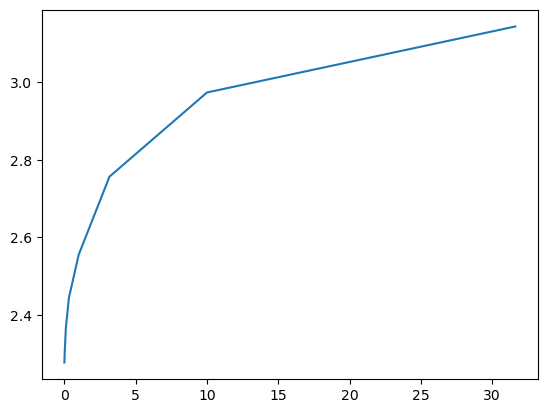

In [356]:
plt.plot(strength_ranges, train_performances)
plt.show()

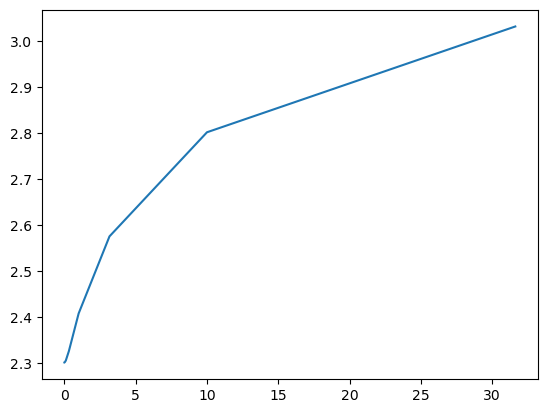

In [358]:
plt.plot(strength_ranges, val_performances)
plt.show()

In [359]:
best_strength = strength_ranges[torch.argmin(torch.tensor(val_performances))]
print(best_strength)

generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True
epochs = 500

for epoch in range(epochs):
    logits = one_hot_input @ W
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(tri_train_labels)), tri_train_labels]))
    regularizer = torch.mean(W**2) * best_strength
    loss += regularizer
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad

    if epoch == (epochs - 1):
        for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels), "test": (tri_test_inputs, tri_test_labels)}.items():
            eval_dataset, eval_labels = eval_data
            eval_logits = F.one_hot(eval_dataset, 729).float() @ W
            eval_counts = eval_logits.exp()
            eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
            eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
            print(f"Performance on {eval_name}: {eval_loss})")

tensor(1.0000e-04)


/var/folders/sv/0hsl00jn4glf08wd477vxd900000gn/T/ipykernel_31098/349413207.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()


tensor(3.7632, grad_fn=<AddBackward0>)
tensor(3.6617, grad_fn=<AddBackward0>)
tensor(3.5889, grad_fn=<AddBackward0>)
tensor(3.5280, grad_fn=<AddBackward0>)
tensor(3.4742, grad_fn=<AddBackward0>)
tensor(3.4254, grad_fn=<AddBackward0>)
tensor(3.3805, grad_fn=<AddBackward0>)
tensor(3.3388, grad_fn=<AddBackward0>)
tensor(3.3000, grad_fn=<AddBackward0>)
tensor(3.2638, grad_fn=<AddBackward0>)
tensor(3.2299, grad_fn=<AddBackward0>)
tensor(3.1982, grad_fn=<AddBackward0>)
tensor(3.1685, grad_fn=<AddBackward0>)
tensor(3.1406, grad_fn=<AddBackward0>)
tensor(3.1144, grad_fn=<AddBackward0>)
tensor(3.0897, grad_fn=<AddBackward0>)
tensor(3.0664, grad_fn=<AddBackward0>)
tensor(3.0445, grad_fn=<AddBackward0>)
tensor(3.0236, grad_fn=<AddBackward0>)
tensor(3.0039, grad_fn=<AddBackward0>)
tensor(2.9853, grad_fn=<AddBackward0>)
tensor(2.9675, grad_fn=<AddBackward0>)
tensor(2.9507, grad_fn=<AddBackward0>)
tensor(2.9347, grad_fn=<AddBackward0>)
tensor(2.9195, grad_fn=<AddBackward0>)
tensor(2.9051, grad_fn=<A

An interesting pattern which was found was that as regularization strength increases, the training performance decreases as does the validation performance. We would expect that as regularization strength increases, training performance decreases but validation performance increases up until a point, in which the regularization strength is too big (enforces the weights to be small too strongly) that it starts to generalize/perform on validation set more poorly

Question: we saw that our 1-hot vectors merely select a row of W, so producing these vectors explicitly feels wasteful. Can you delete our use of F.one_hot in favor of simply indexing into rows of W?

In [360]:
print(best_strength)

generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True
epochs = 500

for epoch in range(epochs):
    logits = W[tri_train_inputs]
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(tri_train_labels)), tri_train_labels]))
    regularizer = torch.mean(W**2) * best_strength
    loss += regularizer
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad

    if epoch == (epochs - 1):
        for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels), "test": (tri_test_inputs, tri_test_labels)}.items():
            eval_dataset, eval_labels = eval_data
            eval_logits = F.one_hot(eval_dataset, 729).float() @ W
            eval_counts = eval_logits.exp()
            eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
            eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
            print(f"Performance on {eval_name}: {eval_loss})")

tensor(1.0000e-04)


/var/folders/sv/0hsl00jn4glf08wd477vxd900000gn/T/ipykernel_31098/3236676795.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()


tensor(3.7632, grad_fn=<AddBackward0>)
tensor(3.6617, grad_fn=<AddBackward0>)
tensor(3.5889, grad_fn=<AddBackward0>)
tensor(3.5280, grad_fn=<AddBackward0>)
tensor(3.4742, grad_fn=<AddBackward0>)
tensor(3.4254, grad_fn=<AddBackward0>)
tensor(3.3805, grad_fn=<AddBackward0>)
tensor(3.3388, grad_fn=<AddBackward0>)
tensor(3.3000, grad_fn=<AddBackward0>)
tensor(3.2638, grad_fn=<AddBackward0>)
tensor(3.2299, grad_fn=<AddBackward0>)
tensor(3.1982, grad_fn=<AddBackward0>)
tensor(3.1685, grad_fn=<AddBackward0>)
tensor(3.1406, grad_fn=<AddBackward0>)
tensor(3.1144, grad_fn=<AddBackward0>)
tensor(3.0897, grad_fn=<AddBackward0>)
tensor(3.0664, grad_fn=<AddBackward0>)
tensor(3.0445, grad_fn=<AddBackward0>)
tensor(3.0236, grad_fn=<AddBackward0>)
tensor(3.0039, grad_fn=<AddBackward0>)
tensor(2.9853, grad_fn=<AddBackward0>)
tensor(2.9675, grad_fn=<AddBackward0>)
tensor(2.9507, grad_fn=<AddBackward0>)
tensor(2.9347, grad_fn=<AddBackward0>)
tensor(2.9195, grad_fn=<AddBackward0>)
tensor(2.9051, grad_fn=<A

Question: look up and use F.cross_entropy instead. You should achieve the same result. Can you think of why we'd prefer to use F.cross_entropy instead?

In [361]:
generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True
epochs = 500

for epoch in range(epochs):
    logits = W[tri_train_inputs]
    counts = logits.exp()
    probs = counts/torch.sum(counts, dim = 1, keepdim = True)
    loss = torch.mean(-torch.log(probs[torch.arange(len(tri_train_labels)), tri_train_labels]))
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad

    if epoch == (epochs - 1):
        for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels), "test": (tri_test_inputs, tri_test_labels)}.items():
            eval_dataset, eval_labels = eval_data
            eval_logits = F.one_hot(eval_dataset, 729).float() @ W
            eval_counts = eval_logits.exp()
            eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
            eval_loss = torch.mean(-torch.log(eval_probs[torch.arange(len(eval_labels)), eval_labels]))
            print(f"Performance on {eval_name}: {eval_loss})")

/var/folders/sv/0hsl00jn4glf08wd477vxd900000gn/T/ipykernel_31098/3595053231.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()


tensor(3.7631, grad_fn=<MeanBackward0>)
tensor(3.6616, grad_fn=<MeanBackward0>)
tensor(3.5888, grad_fn=<MeanBackward0>)
tensor(3.5279, grad_fn=<MeanBackward0>)
tensor(3.4741, grad_fn=<MeanBackward0>)
tensor(3.4253, grad_fn=<MeanBackward0>)
tensor(3.3804, grad_fn=<MeanBackward0>)
tensor(3.3387, grad_fn=<MeanBackward0>)
tensor(3.2999, grad_fn=<MeanBackward0>)
tensor(3.2637, grad_fn=<MeanBackward0>)
tensor(3.2298, grad_fn=<MeanBackward0>)
tensor(3.1981, grad_fn=<MeanBackward0>)
tensor(3.1684, grad_fn=<MeanBackward0>)
tensor(3.1405, grad_fn=<MeanBackward0>)
tensor(3.1143, grad_fn=<MeanBackward0>)
tensor(3.0896, grad_fn=<MeanBackward0>)
tensor(3.0664, grad_fn=<MeanBackward0>)
tensor(3.0444, grad_fn=<MeanBackward0>)
tensor(3.0235, grad_fn=<MeanBackward0>)
tensor(3.0038, grad_fn=<MeanBackward0>)
tensor(2.9852, grad_fn=<MeanBackward0>)
tensor(2.9674, grad_fn=<MeanBackward0>)
tensor(2.9506, grad_fn=<MeanBackward0>)
tensor(2.9346, grad_fn=<MeanBackward0>)
tensor(2.9194, grad_fn=<MeanBackward0>)


In [362]:
generator = torch.Generator().manual_seed(7)
one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()
W = torch.randn(size = (729, 27), generator = generator); W.requires_grad = True
epochs = 500

for epoch in range(epochs):
    logits = W[tri_train_inputs]
    loss = F.cross_entropy(logits, tri_train_labels)
    print(loss)

    W.grad = None

    loss.backward()

    W.data -= 50*W.grad

    if epoch == (epochs - 1):
        for eval_name, eval_data in {"val":(tri_val_inputs, tri_val_labels), "test": (tri_test_inputs, tri_test_labels)}.items():
            eval_dataset, eval_labels = eval_data
            eval_logits = F.one_hot(eval_dataset, 729).float() @ W
            eval_counts = eval_logits.exp()
            eval_probs = eval_counts/torch.sum(eval_counts, dim = 1, keepdim = True)
            eval_loss = loss = F.cross_entropy(eval_logits, eval_labels)
            print(f"Performance on {eval_name}: {eval_loss})")

/var/folders/sv/0hsl00jn4glf08wd477vxd900000gn/T/ipykernel_31098/496105201.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  one_hot_input = F.one_hot(torch.tensor(tri_train_inputs), 729).float()


tensor(3.7631, grad_fn=<NllLossBackward0>)
tensor(3.6616, grad_fn=<NllLossBackward0>)
tensor(3.5888, grad_fn=<NllLossBackward0>)
tensor(3.5279, grad_fn=<NllLossBackward0>)
tensor(3.4741, grad_fn=<NllLossBackward0>)
tensor(3.4253, grad_fn=<NllLossBackward0>)
tensor(3.3804, grad_fn=<NllLossBackward0>)
tensor(3.3387, grad_fn=<NllLossBackward0>)
tensor(3.2999, grad_fn=<NllLossBackward0>)
tensor(3.2637, grad_fn=<NllLossBackward0>)
tensor(3.2298, grad_fn=<NllLossBackward0>)
tensor(3.1981, grad_fn=<NllLossBackward0>)
tensor(3.1684, grad_fn=<NllLossBackward0>)
tensor(3.1405, grad_fn=<NllLossBackward0>)
tensor(3.1143, grad_fn=<NllLossBackward0>)
tensor(3.0896, grad_fn=<NllLossBackward0>)
tensor(3.0664, grad_fn=<NllLossBackward0>)
tensor(3.0444, grad_fn=<NllLossBackward0>)
tensor(3.0235, grad_fn=<NllLossBackward0>)
tensor(3.0038, grad_fn=<NllLossBackward0>)
tensor(2.9852, grad_fn=<NllLossBackward0>)
tensor(2.9674, grad_fn=<NllLossBackward0>)
tensor(2.9506, grad_fn=<NllLossBackward0>)
tensor(2.93

Removes the need to softmax the operation prior to computing the log, this not only reduces the amount of code needed/operations performed, but combining the two log and exp operations could provide benefits pertaining to numerical stability